# **AIRLINES SAFETY**

#### *Analysis & Visualization behind the Story ["Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?"](https://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/)*

#### **Define the variables**

| Variables | Definition|
-----------|------------|
| airline   | Airline (* means regional subsidiary included) |
| avial_seat_km_per_week | Available seat kilometers flow every week |
| incidents_85_99 | Total incidents during 1985-1999 |
| fatal_accidents_85_99 | Total fatal accidents during 1985-1999 |
| fatalities_85_99 | Total fatalitites during 1985-1999 |
| incidents_00_14 | Total incidents during 2000-2014 |
| fatal_accidents_00_14 | Total fatal accidents during 2000-2014 |
| fatalities_00_14 | Total fatalitites during 2000-2014 |

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
pd.set_option('max_columns', 200)
airlines = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv')
airlines.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [39]:
airlines['total_incidents'] = airlines[['incidents_85_99','incidents_00_14']].sum(axis=1)
airlines['total_fatal_accidents'] = airlines[['fatal_accidents_85_99','fatal_accidents_00_14']].sum(axis=1)
airlines['total_fatalities'] = airlines[['fatalities_85_99','fatalities_00_14']].sum(axis=1)
airlines.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,total_incidents,total_fatal_accidents,total_fatalities
0,Aer Lingus,320906734,2,0,0,0,0,0,2,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88,82,15,216
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,7,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0,8,1,64
4,Air Canada,1865253802,2,0,0,2,0,0,4,0,0


In [7]:
top_fatalities = airlines.sort_values(by='total_fatalities', ascending=False).reset_index(drop=True)
top_fatalities.iloc[:,[0,-3,-2,-1]][:10]

,airline,total_incidents,total_fatal_accidents,total_fatalities
0,China Airlines,14,7,760
1,Malaysia Airlines,6,3,571
2,Japan Airlines,3,1,520
3,American*,38,8,517
4,Air India*,6,2,487
5,Delta / Northwest*,48,14,458
6,United / Continental*,33,10,428
7,Korean Air,13,5,425
8,Air France,20,6,416
9,Avianca,5,3,323


In [64]:
airlines_reset = airlines.set_index('airline')
airlines_reset.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,total_incidents,total_fatal_accidents,total_fatalities
airline,,,,,,,,,,
Aeroflot*,1197672318,76,14,128,6,1,88,82,15,216
Delta / Northwest*,6525658894,24,12,407,24,2,51,48,14,458
American*,5228357340,21,5,101,17,3,416,38,8,517
United / Continental*,7139291291,19,8,319,14,2,109,33,10,428
Ethiopian Airlines,488560643,25,5,167,5,2,92,30,7,259


In [41]:
airlines = airlines.sort_values(by='total_incidents', ascending=False).reset_index(drop=True)
airlines.head(3)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,total_incidents,total_fatal_accidents,total_fatalities
0,Aeroflot*,1197672318,76,14,128,6,1,88,82,15,216
1,Delta / Northwest*,6525658894,24,12,407,24,2,51,48,14,458
2,American*,5228357340,21,5,101,17,3,416,38,8,517


In [50]:
airlines['airline'].iloc[[5,15,25,35,45]]

5     US Airways / America West*
15               Xiamen Airlines
25                    Lufthansa*
35         Sri Lankan / AirLanka
45                  LAN Airlines
Name: airline, dtype: object

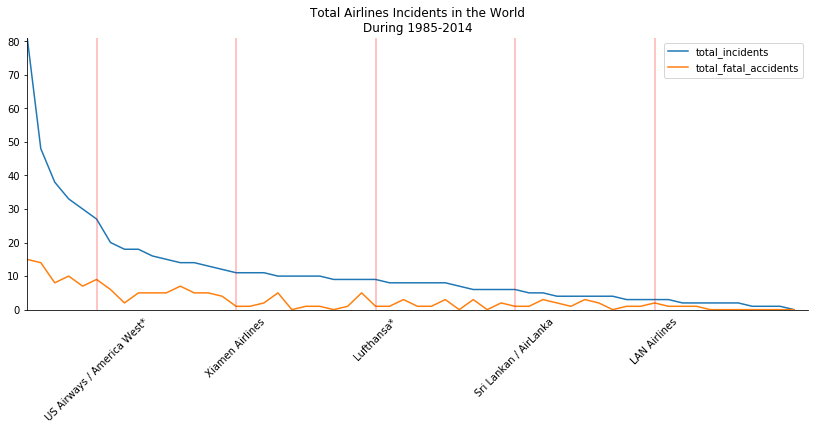

In [93]:
from numpy import arange
fig,ax = plt.subplots(1,1, figsize=(14,5))
ax.plot(airlines['total_incidents'])
ax.plot(airlines['total_fatal_accidents'])
ax.set_xlim(0,56)
ax.set_ylim(0,81)
ax.set_xticks([5,15,25,35,45])
ax.set_xticklabels(['US Airways / America West*',
                    'Xiamen Airlines',
                    'Lufthansa*',
                    'Sri Lankan / AirLanka',
                    'LAN Airlines'], rotation=45)
ax.legend(loc='best')
for num in [5,15,25,35,45]:
    ax.axvline(num, alpha=0.3, c='red')
ax.set_title('Total Airlines Incidents in the World\nDuring 1985-2014')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)
# ax.plot(airlines[''])

In [63]:
top_seat.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
airline,,,,,,,
United / Continental*,7139291291,19,8,319,14,2,109
Delta / Northwest*,6525658894,24,12,407,24,2,51
American*,5228357340,21,5,101,17,3,416
Lufthansa*,3426529504,6,1,2,3,0,0
Southwest Airlines,3276525770,1,0,0,8,0,0


In [65]:
top_seat = airlines_reset.sort_values(by='avail_seat_km_per_week', ascending=False)
top_seat[['avail_seat_km_per_week','total_incidents','total_fatal_accidents']][:10]

,avail_seat_km_per_week,total_incidents,total_fatal_accidents
airline,,,
United / Continental*,7139291291,33,10
Delta / Northwest*,6525658894,48,14
American*,5228357340,38,8
Lufthansa*,3426529504,9,1
Southwest Airlines,3276525770,9,0
British Airways*,3179760952,10,0
Air France,3004002661,20,6
Cathay Pacific*,2582459303,2,0
US Airways / America West*,2455687887,27,9


Text(0.5,0,'Number Of Incidents')

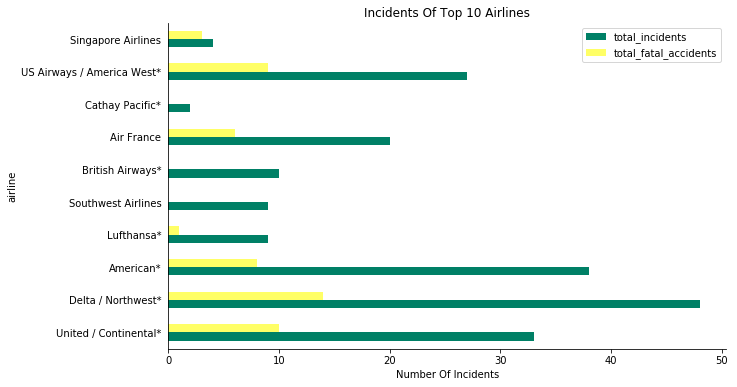

In [130]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
top_seat[:10].plot.barh(y=['total_incidents','total_fatal_accidents'],
                        cmap='summer',
                        title='Incidents Of Top 10 Airlines', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)
ax.set_xlabel('Number Of Incidents')

In [99]:
# Corrlation between those figures
airlines.iloc[:5,[1,-3,-2,-1]].corr()

,avail_seat_km_per_week,total_incidents,total_fatal_accidents,total_fatalities
avail_seat_km_per_week,1.000000,-0.347390,0.084483,0.870595
total_incidents,-0.347390,1.000000,0.833311,-0.499002
total_fatal_accidents,0.084483,0.833311,1.000000,-0.215027
total_fatalities,0.870595,-0.499002,-0.215027,1.000000


--> the Correlation between **"Available seat-km per week"** and **"Total fatalities"** is quite high (0.87).

So is the ratio between **"Total incidents"** and **"Total Fatal Accidents"** (0.83).

Let's visualize those correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000125F0E48>,
      dtype=object)

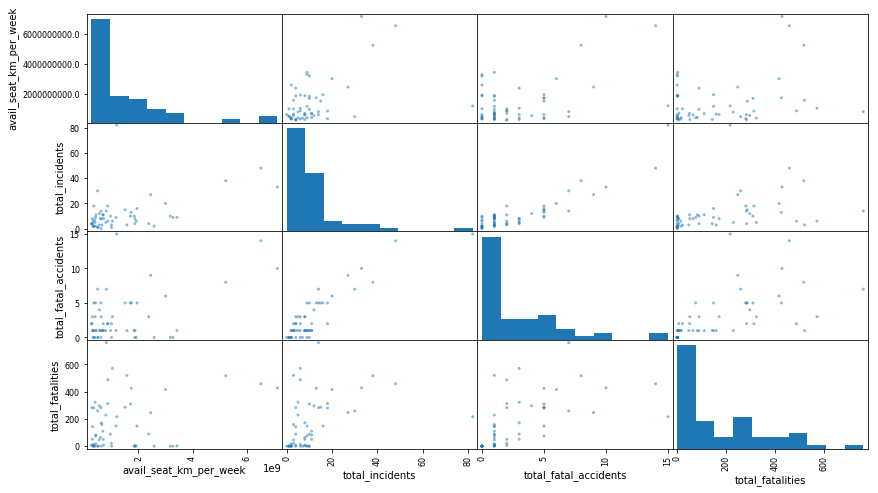

In [96]:
from pandas.plotting import scatter_matrix
scatter_matrix(airlines[['avail_seat_km_per_week','total_incidents','total_fatal_accidents','total_fatalities']],
               figsize=(14,8))

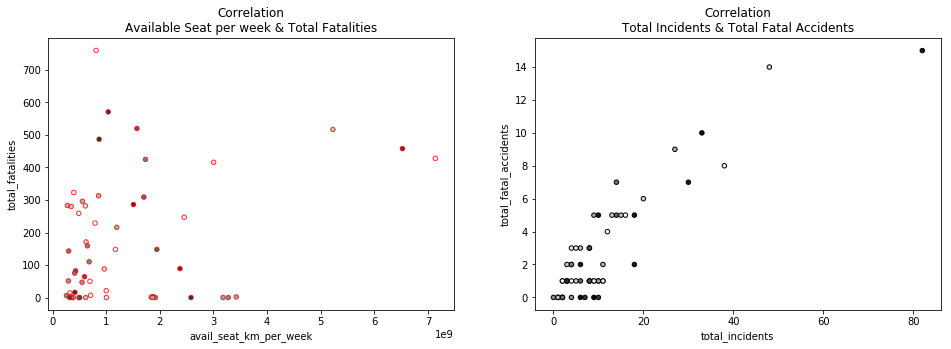

In [138]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
airlines.plot.scatter(x='avail_seat_km_per_week',
                      y='total_fatalities',
                      c=np.random.rand(airlines.shape[0]),
                      alpha=0.8, edgecolor='red',
                      ax=ax1,
                      title='Correlation\nAvailable Seat per week & Total Fatalities')
airlines.plot.scatter(x='total_incidents',
                      y='total_fatal_accidents',
                      c=np.random.rand(airlines.shape[0]),
                      edgecolor='black', ax=ax2,
                      title='Correlation\nTotal Incidents & Total Fatal Accidents')